In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import precision_score, accuracy_score,recall_score, f1_score
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import roc_curve, auc
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load data
merged = pd.read_pickle('../dataset/meth_2class.pkl')
merged.head()

,end,cg07881041,cg03513874,cg05451842,cg14797042,cg09838562,cg25458538,cg09261072,cg02404579,cg04118974,...,cg23020486,cg10295858,cg11606463,cg04767756,cg05166473,cg19812938,cg06272054,cg07255356,cg24220897,cg12325588
id,,,,,,,,,,,,,,,,,,,,,
n337,0,0.958538,0.979939,0.013533,0.983516,0.016232,0.973240,0.677887,0.918497,0.643996,...,0.005889,0.951705,0.959841,0.962222,0.904435,0.893996,0.010813,0.013194,0.955439,0.010750
n342,0,0.955460,0.965380,0.017410,0.986156,0.017837,0.970117,0.697211,0.905924,0.617596,...,0.012772,0.955416,0.961274,0.966176,0.871182,0.899968,0.011585,0.012844,0.945449,0.015251
n350,0,0.957872,0.968616,0.012820,0.990030,0.009743,0.975100,0.718051,0.901125,0.593293,...,0.009822,0.950247,0.959483,0.968373,0.873732,0.900965,0.009971,0.013615,0.958734,0.014217
n353,0,0.961997,0.970718,0.025659,0.983666,0.019061,0.970981,0.685835,0.921946,0.623353,...,0.007938,0.946216,0.958511,0.965726,0.881631,0.898304,0.007210,0.009933,0.953894,0.014208
n355,0,0.957528,0.969891,0.017548,0.987591,0.016265,0.971158,0.690440,0.931624,0.647079,...,0.011622,0.955507,0.967023,0.969056,0.856921,0.895616,0.007942,0.013019,0.946188,0.011737


In [3]:
merged = merged.reset_index(drop=False)
merged.head()

,id,end,cg07881041,cg03513874,cg05451842,cg14797042,cg09838562,cg25458538,cg09261072,cg02404579,...,cg23020486,cg10295858,cg11606463,cg04767756,cg05166473,cg19812938,cg06272054,cg07255356,cg24220897,cg12325588
0,n337,0,0.958538,0.979939,0.013533,0.983516,0.016232,0.973240,0.677887,0.918497,...,0.005889,0.951705,0.959841,0.962222,0.904435,0.893996,0.010813,0.013194,0.955439,0.010750
1,n342,0,0.955460,0.965380,0.017410,0.986156,0.017837,0.970117,0.697211,0.905924,...,0.012772,0.955416,0.961274,0.966176,0.871182,0.899968,0.011585,0.012844,0.945449,0.015251
2,n350,0,0.957872,0.968616,0.012820,0.990030,0.009743,0.975100,0.718051,0.901125,...,0.009822,0.950247,0.959483,0.968373,0.873732,0.900965,0.009971,0.013615,0.958734,0.014217
3,n353,0,0.961997,0.970718,0.025659,0.983666,0.019061,0.970981,0.685835,0.921946,...,0.007938,0.946216,0.958511,0.965726,0.881631,0.898304,0.007210,0.009933,0.953894,0.014208
4,n355,0,0.957528,0.969891,0.017548,0.987591,0.016265,0.971158,0.690440,0.931624,...,0.011622,0.955507,0.967023,0.969056,0.856921,0.895616,0.007942,0.013019,0.946188,0.011737


In [7]:
from sklearn.utils import shuffle
#shuffled = shuffle(merged)
#shuffled.to_pickle('../dataset/meth_shuffled_2class.pkl')
shuffled = pd.read_pickle('../dataset/meth_shuffled_2class.pkl')
labels = np.array(shuffled['end'])
features = np.array(shuffled.drop(columns=['end','id']))
print(labels.shape)
print(features.shape)

X = features
Y = labels
print(Y)

(38,)
(38, 729735)
[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0
 0]


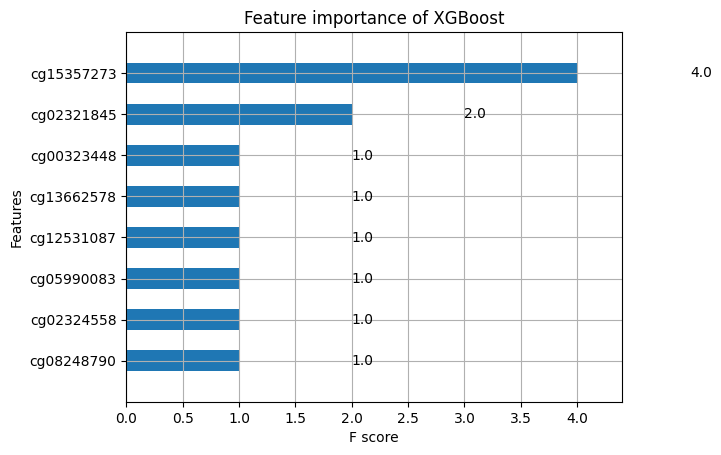

In [9]:
## feature importance
import matplotlib.pyplot as plt
%matplotlib inline
import xgboost as xgb

# xgboost
model_name='XGBoost'

import xgboost
clf = xgb.XGBClassifier(n_jobs=-1)
clf.fit(X, Y)

feature_names = merged.drop(columns=['end','id']).columns.values.tolist()
clf.get_booster().feature_names = feature_names
xgboost.plot_importance(clf, height=0.5, max_num_features=13)
plt.title('Feature importance of '  + model_name)
plt.savefig('../images/meth2class/feature_' + model_name,dpi=300, bbox_inches = 'tight')
plt.show()

In [12]:
import lightgbm as lgb
model_name='LightGBM'
feature_names = merged.drop(columns=['end','id']).columns.values.tolist()

params = {
    'task': 'train',
    'boosting_type': 'gbdt',  
    'objective': 'regression',  
    'metric': {'auc'},  
    'num_leaves': 20,  
    'learning_rate': 0.05,  
    'feature_fraction': 0.9,  
    'bagging_fraction': 0.8,  
    'bagging_freq': 5,  
    'verbose': 1  
}

import lightgbm as lgb
train = lgb.Dataset(data=merged.drop(columns=['end','id']),label=merged['end'])
#clf = lgb.LGBMClassifier(n_jobs=-1)
clf = lgb.train(params,train)

ax = lgb.plot_importance(clf, height=0.5, max_num_features=13)
plt.title('Feature importance of '  + model_name)

plt.savefig('../images/meth2class/feature_' + model_name,dpi=300, bbox_inches = 'tight')
plt.show()

[LightGBM] [Warning] There are no meaningful features, as all feature values are constant.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 38, number of used features: 0
[LightGBM] [Info] Start training from score 0.131579
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGB

ValueError: not enough values to unpack (expected 2, got 0)

In [22]:
# 2-feature
feature2 = shuffled[['cg15357273','cg02321845','end']]
feature2

,cg15357273,cg02321845,end
8,0.806761,0.909072,0
37,0.847312,0.860203,0
6,0.840404,0.928288,0
14,0.838446,0.856815,0
31,0.809566,0.902443,0
17,0.915737,0.876655,0
20,0.795280,0.935441,1
32,0.833699,0.827863,0
26,0.807484,0.927209,0
9,0.907401,0.781620,0


In [23]:
train = feature2[0:int(0.85*shuffled.shape[0])]
test = feature2[int(0.85*shuffled.shape[0]):]

train_y = np.array(train['end'])
train_x = np.array(train.drop(columns=['end']))
test_y = np.array(test['end'])
test_x = np.array(test.drop(columns=['end']))

[[0.977597   0.02240301]
 [0.25059652 0.7494035 ]
 [0.977597   0.02240301]
 [0.977597   0.02240301]
 [0.977597   0.02240301]
 [0.977597   0.02240301]]
              precision    recall  f1-score   support

      re/sym       1.00      1.00      1.00         5
         con       1.00      1.00      1.00         1

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



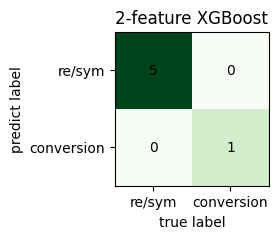

In [32]:
import xgboost as xgb
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.utils import class_weight
# , sample_weight=compute_sample_weight("balanced", y)
model_name = 'XGBoost'

clf = xgb.XGBClassifier(n_jobs=-1)
clf.fit(train_x, train_y)
result = clf.predict_proba(test_x)
print(result)

y_pred = np.argmax(result,axis=1)

t = classification_report(test_y, y_pred, target_names=['re/sym', 'con'])
print(t)
confusion = confusion_matrix(test_y, y_pred)
ax = plt.figure(figsize=(2, 2))
#ax = sns.heatmap(confusion, fmt='.2f', cmap='Blues', annot=True)
ax = plt.imshow(confusion.T, cmap='Greens')
indices = range(len(confusion))
classes = ['re/sym', 'conversion']
#ax.set_yticklabels(labels=ax.get_yticklabels(), va='center')
plt.xticks(indices, classes)
plt.yticks(indices, classes)
plt.xlabel("true label")
plt.ylabel("predict label")
plt.title('2-feature '  + model_name)
for first_index in range(len(confusion)):
    for second_index in range(len(confusion[first_index])):
        plt.text(first_index, second_index, confusion[first_index][second_index],ha='center',va='center')
        #plt.text(first_index, second_index, np.round(float(confusion[first_index][second_index])/np.sum(confusion[first_index]),2),ha='center')
plt.savefig('../images/meth2class/CM_' + model_name,dpi=300, bbox_inches = 'tight')
plt.show()

In [51]:
feature2.to_pickle('../dataset/meth_2class_feature2.pkl')

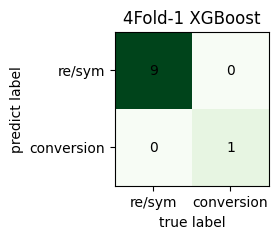

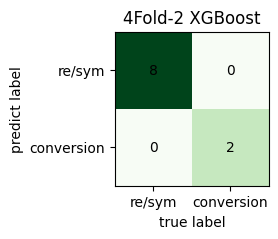

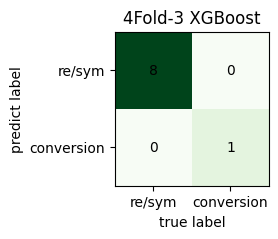

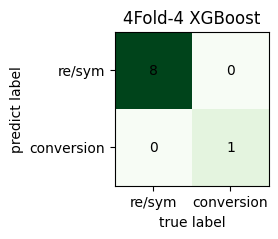

In [49]:
# 5-fold
model_name = 'XGBoost'
cv_result = []
cv_label = []
cv = KFold(n_splits=4)
for train_index, valid_index in cv.split(X):
    train_x,test_x = np.array(feature2.drop(columns=['end']))[train_index], np.array(feature2.drop(columns=['end']))[valid_index]
    train_y,test_y = np.array(feature2['end'])[train_index], np.array(feature2['end'])[valid_index]
    #clf = xgb.XGBClassifier(n_jobs=-1,n_estimators=15,max_depth=6)
    clf = xgb.XGBClassifier(n_jobs=-1)
    clf.fit(train_x, train_y)
    result = clf.predict_proba(test_x)
    cv_result.append(result)
    cv_label.append(test_y)
#print(cv_result)
#print(cv_label)

acc_list = []
precision_list = []
recall_list = []
f1_list = []
auc_list = []

for i in range(4): # 5-fold evaluation
    y_score = cv_result[i].argmax(axis=1)                                   
    y_score_pro = cv_result[i] # (.., 2)
    y_one_hot = to_categorical(cv_label[i])
    y_score_one_hot = to_categorical(y_score)

    confusion = confusion_matrix(cv_label[i], y_score)

    ax = plt.figure(figsize=(2, 2))
    #ax = sns.heatmap(confusion, fmt='.2f', cmap='Blues', annot=True)
    ax = plt.imshow(confusion.T, cmap='Greens')
    indices = range(len(confusion))
    classes = ['re/sym', 'conversion']
    #ax.set_yticklabels(labels=ax.get_yticklabels(), va='center')
    plt.xticks(indices, classes)
    plt.yticks(indices, classes)
    plt.xlabel("true label")
    plt.ylabel("predict label")
    plt.title('4Fold-' + str(i+1) + ' ' + model_name)
    for first_index in range(len(confusion)):
        for second_index in range(len(confusion[first_index])):
            plt.text(first_index, second_index, confusion[first_index][second_index],ha='center',va='center')
            #plt.text(first_index, second_index, np.round(float(confusion[first_index][second_index])/np.sum(confusion[first_index]),2),ha='center')
    
    plt.savefig('../images/meth2class/4Fold-' + str(i+1) + '-' + model_name + '.png',dpi=300, bbox_inches = 'tight')
    plt.show()


#


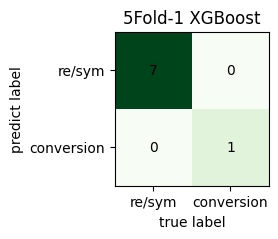

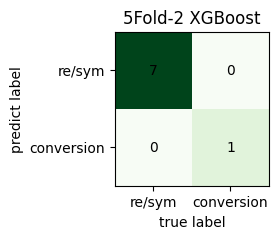

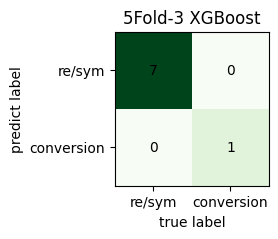

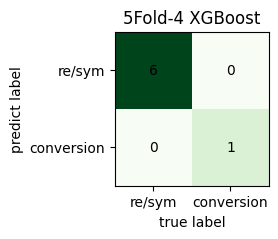

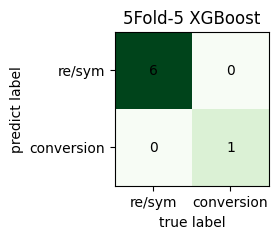

In [50]:
# 5-fold
model_name = 'XGBoost'
cv_result = []
cv_label = []
cv = KFold(n_splits=5)
for train_index, valid_index in cv.split(X):
    train_x,test_x = np.array(feature2.drop(columns=['end']))[train_index], np.array(feature2.drop(columns=['end']))[valid_index]
    train_y,test_y = np.array(feature2['end'])[train_index], np.array(feature2['end'])[valid_index]
    #clf = xgb.XGBClassifier(n_jobs=-1,n_estimators=15,max_depth=6)
    clf = xgb.XGBClassifier(n_jobs=-1)
    clf.fit(train_x, train_y)
    result = clf.predict_proba(test_x)
    cv_result.append(result)
    cv_label.append(test_y)
#print(cv_result)
#print(cv_label)

acc_list = []
precision_list = []
recall_list = []
f1_list = []
auc_list = []

for i in range(5): # 5-fold evaluation
    y_score = cv_result[i].argmax(axis=1)                                   
    y_score_pro = cv_result[i] # (.., 2)
    y_one_hot = to_categorical(cv_label[i])
    y_score_one_hot = to_categorical(y_score)

    confusion = confusion_matrix(cv_label[i], y_score)

    ax = plt.figure(figsize=(2, 2))
    #ax = sns.heatmap(confusion, fmt='.2f', cmap='Blues', annot=True)
    ax = plt.imshow(confusion.T, cmap='Greens')
    indices = range(len(confusion))
    classes = ['re/sym', 'conversion']
    #ax.set_yticklabels(labels=ax.get_yticklabels(), va='center')
    plt.xticks(indices, classes)
    plt.yticks(indices, classes)
    plt.xlabel("true label")
    plt.ylabel("predict label")
    plt.title('5Fold-' + str(i+1) + ' ' + model_name)
    for first_index in range(len(confusion)):
        for second_index in range(len(confusion[first_index])):
            plt.text(first_index, second_index, confusion[first_index][second_index],ha='center',va='center')
            #plt.text(first_index, second_index, np.round(float(confusion[first_index][second_index])/np.sum(confusion[first_index]),2),ha='center')
    
    plt.savefig('../images/meth2class/5Fold-' + str(i+1) + '-' + model_name + '.png',dpi=300, bbox_inches = 'tight')
    plt.show()


(mean) ACC:  1.0 Precision:  1.0 Recall:  1.0 F1:  1.0 AUC:  1.0
(std) ACC:  0.0 Precision:  0.0 Recall:  0.0 F1:  0.0 AUC:  0.0


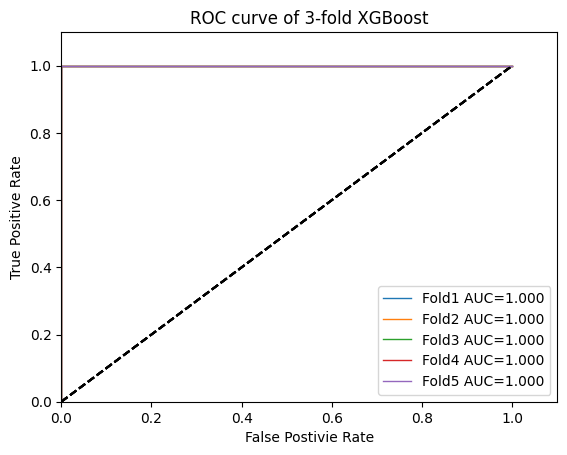

In [43]:
for i in range(5): # 5-fold evaluation
    y_score = cv_result[i].argmax(axis=1)                                   
    y_score_pro = cv_result[i] # (.., 2)
    y_one_hot = to_categorical(cv_label[i])
    y_score_one_hot = to_categorical(y_score)

    acc_list.append(accuracy_score(cv_label[i], y_score))
    precision_list.append(precision_score(cv_label[i], y_score))
    recall_list.append(recall_score(cv_label[i], y_score))
    f1_list.append(f1_score(cv_label[i], y_score))

    fpr, tpr, thresholds = roc_curve(y_one_hot.ravel(),y_score_pro.ravel())   
    auc_list.append(auc(fpr, tpr))

    plt.plot(fpr, tpr, linewidth = 1,label='Fold' + str(i+1) + ' AUC=%.3f' % auc(fpr, tpr))
    plt.plot([0,1],[0,1], 'k--')

print('(mean) ACC: ', np.mean(acc_list), 'Precision: ', np.mean(precision_list), 'Recall: ', np.mean(recall_list), 'F1: ', np.mean(f1_list), 'AUC: ', np.mean(auc_list))
print('(std) ACC: ', np.std(acc_list), 'Precision: ', np.std(precision_list), 'Recall: ', np.std(recall_list), 'F1: ', np.std(f1_list), 'AUC: ', np.std(auc_list))
plt.axis([0,1.1,0,1.1])
plt.xlabel('False Postivie Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.title('ROC curve of 5-fold '  + model_name)
#plt.savefig('images2/roc-5fold-' + year + '-' + var + '.png',dpi=300)
plt.show()

              precision    recall  f1-score   support

      re/sym       0.83      1.00      0.91         5
         con       0.00      0.00      0.00         1

    accuracy                           0.83         6
   macro avg       0.42      0.50      0.45         6
weighted avg       0.69      0.83      0.76         6



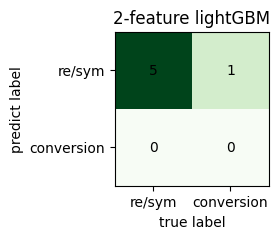

In [31]:
import lightgbm as lgb

model_name = 'lightGBM'

clf = lgb.LGBMClassifier(n_jobs=-1)
clf.fit(train_x, train_y)
result = clf.predict_proba(test_x)
#print(result)
y_pred = np.argmax(result,axis=1)

t = classification_report(test_y, y_pred, target_names=['re/sym', 'con'])
print(t)
confusion = confusion_matrix(test_y, y_pred)
ax = plt.figure(figsize=(2, 2))
#ax = sns.heatmap(confusion, fmt='.2f', cmap='Blues', annot=True)
ax = plt.imshow(confusion.T, cmap='Greens')
indices = range(len(confusion))
classes = ['re/sym', 'conversion']
plt.xticks(indices, classes)
plt.yticks(indices, classes)
plt.xlabel("true label")
plt.ylabel("predict label")
plt.title('2-feature '  + model_name)

for first_index in range(len(confusion)):
    for second_index in range(len(confusion[first_index])):
        plt.text(first_index, second_index, confusion[first_index][second_index],ha='center',va='center')
        #plt.text(first_index, second_index, np.round(float(confusion[first_index][second_index])/np.sum(confusion[first_index]),2),ha='center')
plt.savefig('../images/meth2class/CM_' + model_name,dpi=300, bbox_inches = 'tight')
plt.show()